In [1]:
import utils.data as data
import utils.sub_architectures as sub_architectures
from utils.basic_function import show_photo_grid
from IPython.display import clear_output


import numpy as np
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

def get_device():
    if torch.cuda.is_available():
        device = 'cuda:0'
    else:
        device = 'cpu'
    return device

device = get_device()
print(device)

cuda:0


In [2]:
dataset = data.RandomSamplingFourDGridCutoutDataset(
    n_samples_in_RAM=10,
    resample_every_n_draws=150,
    preprocess_image_options={
        "use_mask": True,
        "equalize_hist": False,
        "crop_black": False,
    },
    crop_shape=(64,64)
)
loader = torch.utils.data.DataLoader(
    dataset, batch_size=16, num_workers=0, shuffle=True
)


In [3]:
model = sub_architectures.FourDAutoencoderV1().to(device)

In [4]:
#Loss function
criterion = nn.MSELoss()

#Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
lr_schedule = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode="min", factor=0.1, patience=2, cooldown=1, verbose=True)

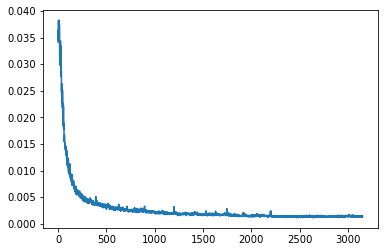

Loss After 50 Epochs: 0.0013620841

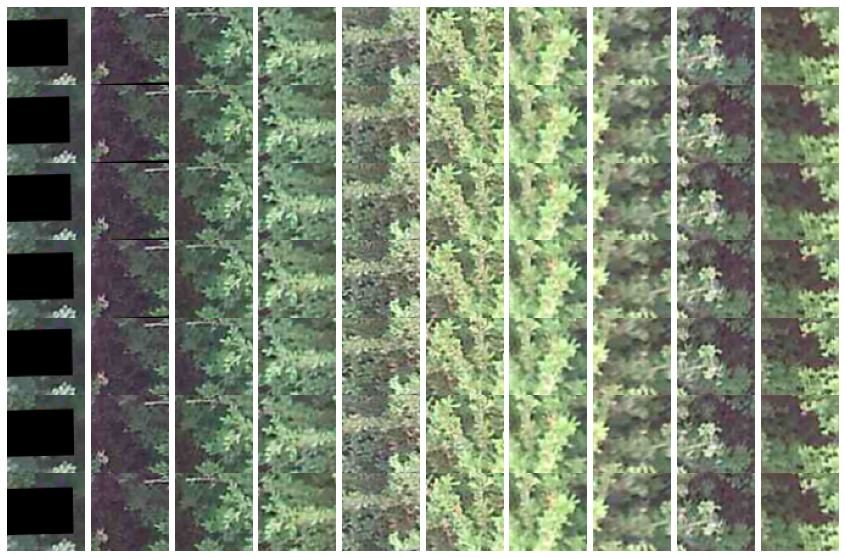

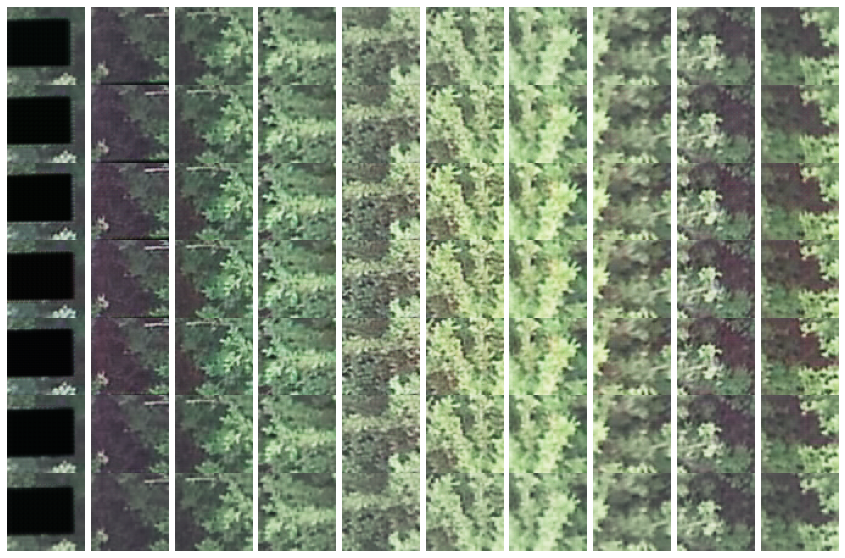

In [5]:
# Epochs
n_epochs = 50
train_loss = []
stop_at = 0

# Training
model.train()
for epoch in range(n_epochs):
    epoch_losses = []
    for x in loader:
        x = x.to(device)
        outputs = model(x)

        loss = criterion(outputs, x)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_losses.append(loss.detach().cpu().numpy())

    clear_output(wait=True)
    train_loss.extend(epoch_losses)
    lr_schedule.step(np.mean(epoch_losses))
    
    plt.plot(range(len(train_loss)), train_loss)
    plt.show()
    print(f"\rLoss After {epoch+1} Epochs: "+str(np.mean(epoch_losses)), end="")
    x_numpy = x.detach().cpu().numpy()
    x_numpy = np.transpose(x_numpy, (0, 2, 3, 4, 5, 1))
    x_numpy_reconstructed = model(x).detach().cpu().numpy()
    x_numpy_reconstructed = np.transpose(x_numpy_reconstructed, (0, 2, 3, 4, 5, 1))
    show_photo_grid(x_numpy[0])
    show_photo_grid(x_numpy_reconstructed[0])


    if np.mean(epoch_losses) < stop_at:
        break


In [8]:
model.save(path="saved_models/FourDAutoencoderV1")

Paramters saved to file 'saved_models/FourDAutoencoderV1/2022-01-21_11-38-17.pt'.


In [8]:
x_numpy = x.detach().cpu().numpy()

In [12]:
x_numpy = np.transpose(x_numpy, (0, 2,3,4,5,1))

In [13]:
x_numpy.shape

(32, 7, 10, 64, 64, 3)

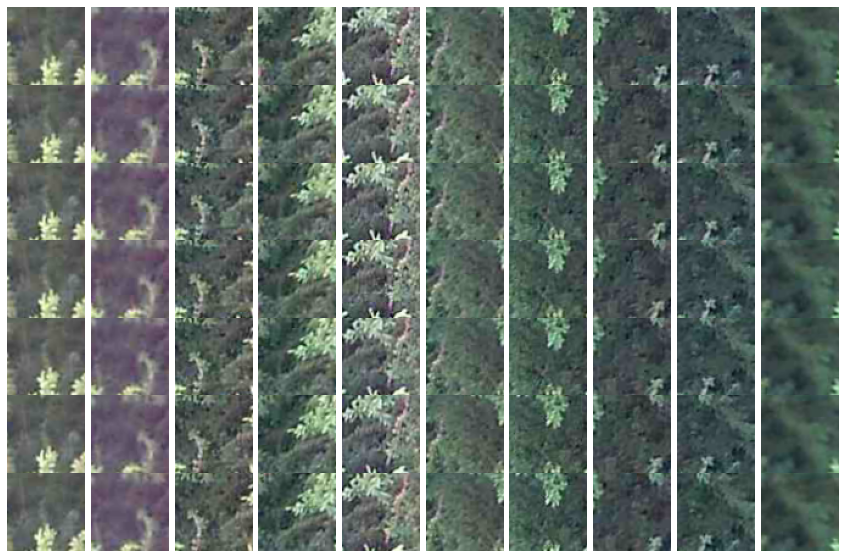

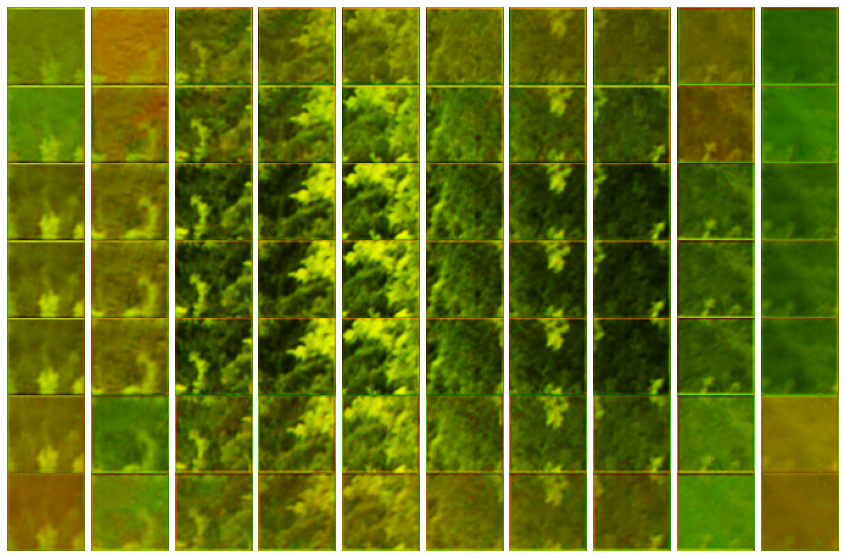

In [14]:
show_photo_grid(x_numpy[0])
show_photo_grid(x_numpy_reconstructed[0])